# Collaboration 4/22/22

In [6]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
sys.path.insert(0, '..')


plt.rcParams['figure.figsize'] = [10, 8]
from graph import Graph
from collaboration import *

In [7]:
k = 100000

In [8]:
ns = [100, 250, 500, 1000, 2500, 5000]

coefficients = []
c = 5
cs = np.arange(c, step=0.01)

def f(x, a1, a2, a3):
    return a1*np.exp(-a2*x)+a3

In [4]:
d = 10
for n in ns:
    graph = Graph.get_er_random_graph(n, d/n)
    t = c*n
    print(f"Simulating n={n}...", end="")
    collab_covered_avg, single_covered_avg = simulate_rw_collab_vs_single(
        graph=graph, 
        collab_num=2, 
        k=k, 
        collab_steps_per_iter=t)
    
    diff = collab_covered_avg - np.array([single_covered_avg[2*i] for i in range(c*n+1)])
    scaled_diff = np.array([diff[int(i*n)] for i in cs])
    
    popt, pcov = curve_fit(f, cs, scaled_diff)
    coefficients.append(popt)
    print("done!")

Simulating n=100...done!
Simulating n=250...done!
Simulating n=500...done!
Simulating n=1000...done!
Simulating n=2500...done!
Simulating n=5000...done!


In [5]:
coefficients

[array([1.06959733, 1.68488103, 0.00282124]),
 array([1.10892671, 1.91187352, 0.00242737]),
 array([1.06292707, 1.8282318 , 0.0172089 ]),
 array([1.06920189, 1.3609847 , 0.01607531]),
 array([1.13441656, 1.97973786, 0.00652199]),
 array([-1.08534972,  0.1330672 ,  1.9134932 ])]

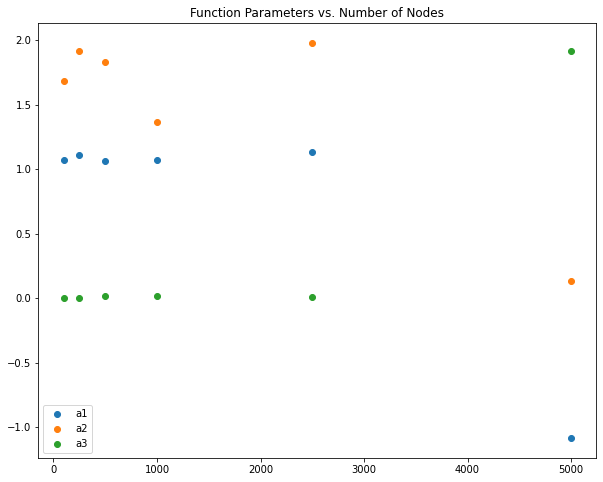

In [13]:
plt.scatter(ns, [i[0] for i in coefficients], label="a1")
plt.scatter(ns, [i[1] for i in coefficients], label="a2")
plt.scatter(ns, [i[2] for i in coefficients], label="a3")
plt.title("Function Parameters vs. Number of Nodes")
plt.legend()
plt.show()

In [7]:
coefficients2 = []
n = 100
ds = [1, 2, 5, 10, 20, 35, 50, 65, 75]
for d in ds:
    graph = Graph.get_er_random_graph(n, d/n)
    t = c*n
    print(f"Simulating d={d}...", end="")
    collab_covered_avg, single_covered_avg = simulate_rw_collab_vs_single(
        graph=graph, 
        collab_num=2, 
        k=k, 
        collab_steps_per_iter=t)
    
    diff = collab_covered_avg - np.array([single_covered_avg[2*i] for i in range(c*n+1)])
    scaled_diff = np.array([diff[int(i*n)] for i in cs])
    
    popt, pcov = curve_fit(f, cs, scaled_diff)
    coefficients2.append(popt)
    print("done!")

Simulating d=1...done!
Simulating d=2...done!
Simulating d=5...done!
Simulating d=10...done!
Simulating d=20...done!
Simulating d=35...done!
Simulating d=50...done!
Simulating d=65...done!
Simulating d=75...done!


In [8]:
coefficients2

[array([-3.13237021,  1.240798  ,  4.96404537]),
 array([-16.38448099,   0.15059562,  17.92470121]),
 array([1.18330456, 1.35177268, 0.04113016]),
 array([1.06001471, 1.7691185 , 0.00876668]),
 array([1.00319506, 1.85067609, 0.00229643]),
 array([ 1.01871031,  2.10096806, -0.0022738 ]),
 array([ 9.92357755e-01,  1.93344860e+00, -1.47585568e-04]),
 array([9.93714923e-01, 2.11747588e+00, 1.73637084e-03]),
 array([0.99202193, 1.9930577 , 0.00233961])]

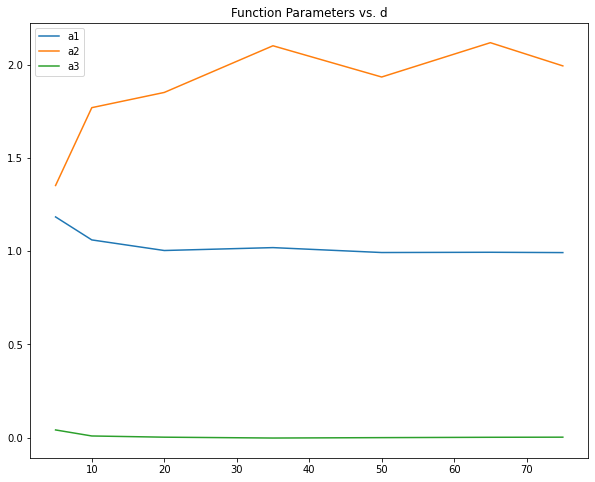

In [16]:
plt.plot(ds[2:], coefficients2[2:], label=["a1", "a2", "a3"])
plt.title("Function Parameters vs. d")
plt.legend()
plt.show()

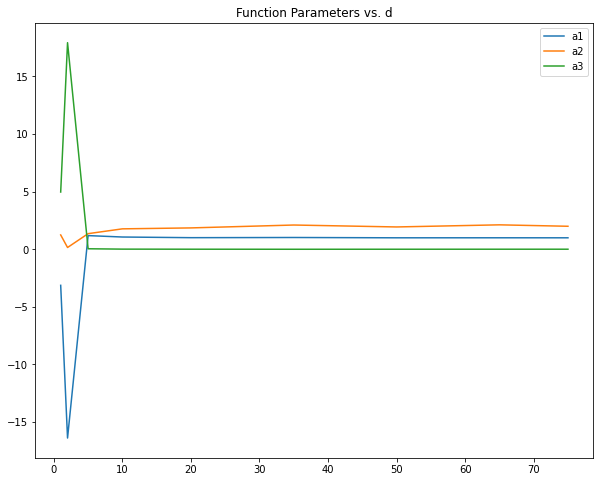

In [17]:
plt.plot(ds, coefficients2, label=["a1", "a2", "a3"])
plt.title("Function Parameters vs. d")
plt.legend()
plt.show()

In [9]:
n = 100
graph = Graph.get_er_random_graph(n, 1/n)
t = c*n
print("Simulating d=1...", end="")
collab_covered_avg, single_covered_avg = simulate_rw_collab_vs_single(
    graph=graph, 
    collab_num=2, 
    k=k, 
    collab_steps_per_iter=t)

diff = collab_covered_avg - np.array([single_covered_avg[2*i] for i in range(c*n+1)])
scaled_diff = np.array([diff[int(i*n)] for i in cs])

Simulating d=1...

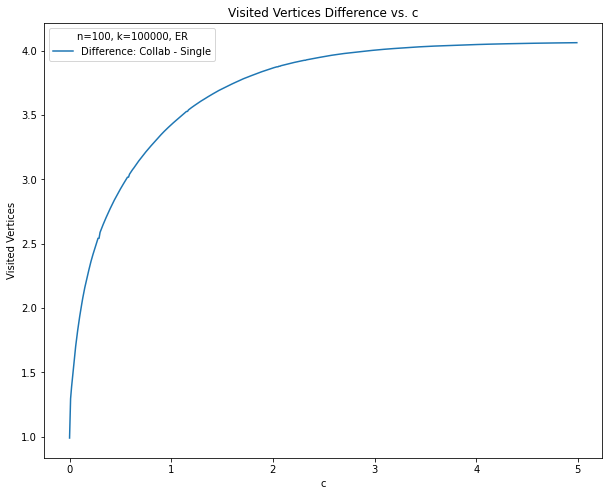

In [10]:
plt.plot(cs, scaled_diff, label='Difference: Collab - Single')
plt.title("Visited Vertices Difference vs. c")
plt.xlabel("c")
plt.ylabel("Visited Vertices")
plt.legend(title=f"n={n}, k={k}, ER")
plt.show()

In [11]:
n = 100
graph = Graph.get_er_random_graph(n, 2/n)
t = c*n
print("Simulating d=2...", end="")
collab_covered_avg, single_covered_avg = simulate_rw_collab_vs_single(
    graph=graph, 
    collab_num=2, 
    k=k, 
    collab_steps_per_iter=t)

diff = collab_covered_avg - np.array([single_covered_avg[2*i] for i in range(c*n+1)])
scaled_diff = np.array([diff[int(i*n)] for i in cs])

Simulating d=2...

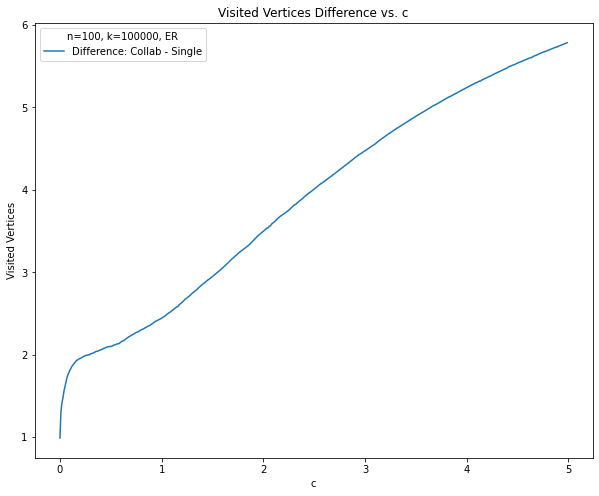

In [12]:
plt.plot(cs, scaled_diff, label='Difference: Collab - Single')
plt.title("Visited Vertices Difference vs. c")
plt.xlabel("c")
plt.ylabel("Visited Vertices")
plt.legend(title=f"n={n}, k={k}, ER")
plt.show()